# Week 3: Part 2: Scale-free networks (BA) and Part 3

Theory behind Scale-Free networks and the Barabasi-Albert Model.

**First a couple of questions to make sure that you've actually read the text.**
- What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).
- What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.

**We're going to create our own Barabasi-Albert model (a special case) in right in a notebook. Follow the recipe below for success:**

## Answering Questions

- What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).
  - Anomalous Regime (γ ≤ 2)
    - the exponent $1/(γ− 1)$ in (4.18) $k_{max}=k_{min} N^{1/(γ− 1)}$ is larger than one, hence the number of links connected to the largest hub grows faster than the size of the network. This means that for sufficiently large N the degree of the largest hub must exceed the total number of nodes in the network, hence it will run out of nodes to connect to.
  - Scale-Free Regime (2 ‹ γ ‹ 3)
    - Ultra small world
    - for γ=2 $k_{max} ~ N$
    - Here the mean is finite in the degree distribution but the other moments such as the variance is not finite. 
  - Random Network Regime (γ › 3)
    - small world
    - Indistingushable from random network
    - for γ > 3 both the first and the second moments are finite. 
- What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.
  - Sublinear Preferential Attachment (0 < α < 1)
    - For any α > 0 new nodes favor the more connected nodes over the less connected nodes. Yet, for α < 1 the bias is weak, not sufficient to generate a scale-free degree distribution. Instead, in this regime the degrees follow the stretched exponential distribution.
  - Linear Preferential Attachment (α = 1)
    - Scale-free
    - This corresponds to the Barabási-Albert model, hence the degree distribution follows a power law.
  - Superlinear Preferential Attachment (α > 1)
    - For α > 1 the tendency to link to highly connected nodes is enhanced, accelerating the rich-gets-richer process
    - earliest nodes become super hubs and all subsequent nodes link to them

## Create our own Barabasi-Albert model
- First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).
- Now add another node, connecting one of the existing nodes in proportion to their degree.
- Keep going until you have a 100 node network.
  - Hint: The difficult part here is connecting to each node according to their degree. The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). That list contains each node in proportion to its connections, thus drawing a random node from that list (e.g. using random.choice) corresponds to selecting a node with probability proportional to it's degree.
- Plot the network.
- Add more nodes until you have a 5000 node network.
- What's the maximum and minimum degree?
- Now, bin the degree distribution using numpy.histogram.
- Plot the distribution. Plot it with both linear and log-log axes.

*Single link graph*

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

(0, 1)
0
1
Nodes: [0, 1]
Edges: [(0, 1)]


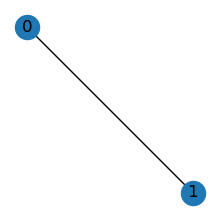

In [18]:
# single link graph
G = nx.Graph()
G.add_edge(0, 1)

# plot
plt.figure(figsize=(2,2))
nx.draw(G, with_labels=True)

for edge in G.edges():
    print(edge)
    for node in edge:
        print(node)

# List of nodes
print("Nodes:", G.nodes())
# List of edges
print("Edges:", G.edges())

In [19]:
# add 100 nodes, connecting one of the existing nodes in proportion to their degree

import random
# Generate a list of all edges and flatten it
nodes = []
for edge in G.edges():
    for node in edge:
        nodes.append(node)

for new_node in range(2, 100):
    # Choose an existing node with probability proportional to its degree
    existing_node = random.choice(nodes)
    # Add the new node and connect it to the chosen existing node
    G.add_edge(new_node, existing_node)
    nodes.append(new_node)
    nodes.append(existing_node)


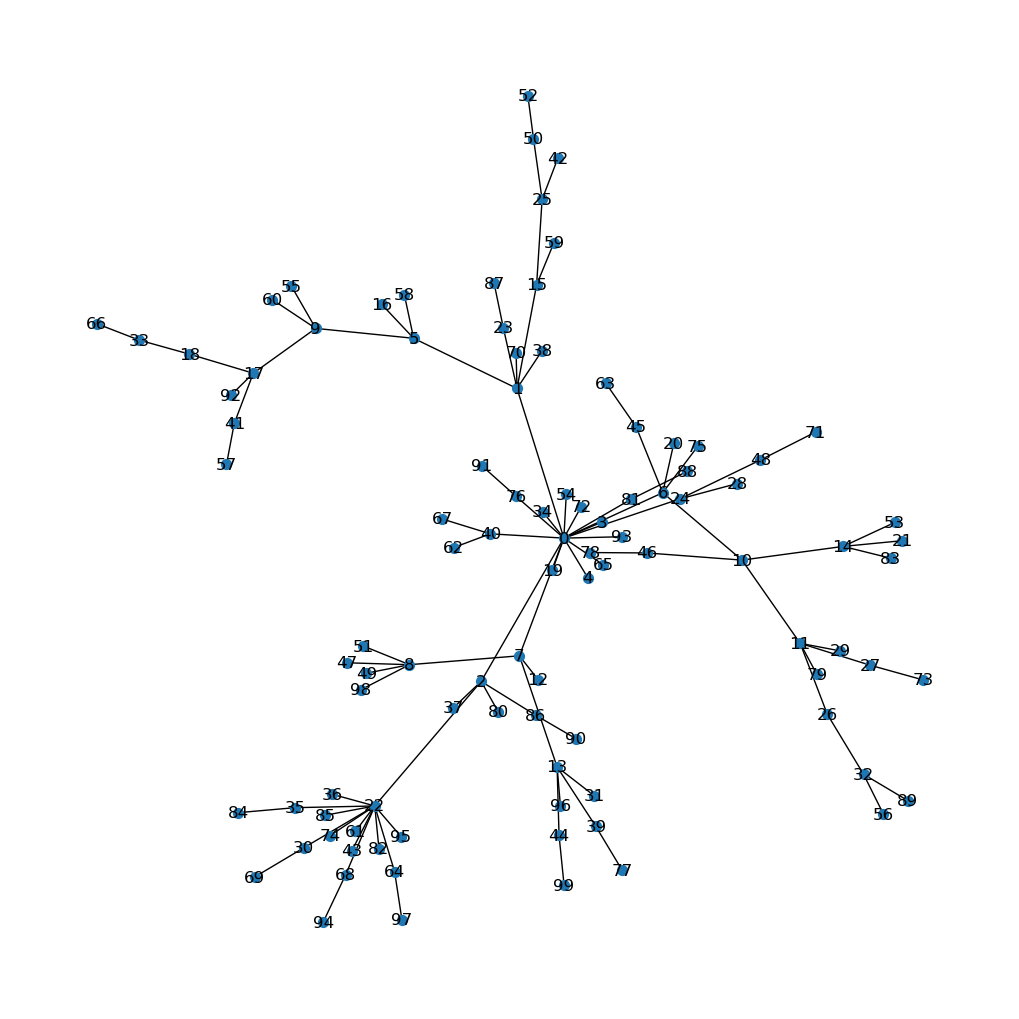

In [20]:
#Plot the network
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_size=50)
plt.show()

In [21]:
# Add more nodes until you have a 5000 node network.
for new_node in range(101, 5000):
    # Choose an existing node with probability proportional to its degree
    existing_node = random.choice(nodes)
    # Add the new node and connect it to the chosen existing node
    G.add_edge(new_node, existing_node)
    nodes.append(new_node)
    nodes.append(existing_node)


In [22]:
# What's the maximum and minimum degree?
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)
dmin = min(degree_sequence)
print(f"Maximum degree: {dmax}")
print(f"Minimum degree: {dmin}")
# Now, bin the degree distribution using numpy.histogram.
# Plot the distribution. Plot it with both linear and log-log axes.

Maximum degree: 98
Minimum degree: 1


In [25]:
print(degree_sequence)

[98, 92, 53, 44, 43, 41, 39, 35, 35, 34, 34, 33, 33, 31, 31, 28, 27, 27, 26, 24, 24, 24, 23, 23, 22, 22, 22, 21, 21, 21, 21, 20, 18, 18, 17, 17, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

Histogram: [3307  867  335  168   89   59   30   35   18    9   15    6    7    7
    7    4    2    2    0    1    4    3    2    3    0    1    2    1
    0    0    2    0    2    2    2    0    0    0    1    0    1    0
    1    1    0    0    0    0    0    0    0    0    1    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    1    0    0    0    0    0    1]
Bin edges: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]


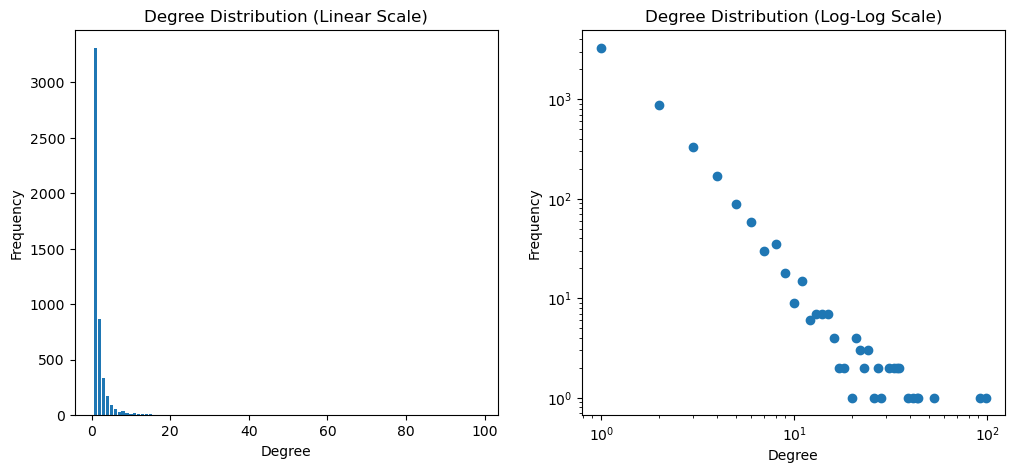

In [ ]:
# Now, bin the degree distribution using numpy.histogram.
hist, bin_edges = np.histogram(degree_sequence, bins=range(dmin, (dmax+1) +1))
print("Histogram:", hist)
print("Bin edges:", bin_edges)

# Plot the distribution. Plot it with both linear and log-log axes.
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(bin_edges[:-1], hist, width=0.8, align='center')
plt.title('Degree Distribution (Linear Scale)')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.loglog(bin_edges[:-1], hist, marker='o', linestyle='None')
plt.title('Degree Distribution (Log-Log Scale)')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

# Part 3: The friendship paradox in scale-free networks
**Exercise1: The friendship paradox in BA networks**

**Exercise2: The friendship paradox more generally**

**Exercise3: The friendship paradox and the configuration model**

**Exercise4: Growth without preferential attachment**

**Exercise1: The friendship paradox in BA networks**

- Pick a node i at random (e.g. use random.choice). Find its degree.
- Find i's neighbors. And calculate their average degree.
- Compare the two numbers to check if it's true that i's friends (on average) have more friends than i.
- Do this 1000 times. How many out of those 1000 times is the friendship paradox true in F-BA?

In [ ]:
# coping the network from part 2
F_BA = G

# pick a node i at random (e.g. use random.choice). Find its degree.
import random
random.seed(42)  # For reproducibility
i = random.choice(list(F_BA.nodes()))
degree_i = F_BA.degree(i)
print(f"Node {i} has degree {degree_i}")

# Find i's neighbors. And calculate their average degree.
neighbors = list(F_BA.neighbors(i))
avg_neighbor_degree = np.mean([F_BA.degree(n) for n in neighbors])

# compare
print(f"Average degree of neighbors of node {i} is {avg_neighbor_degree}")
print(f"Average degree of neighbors of node {i} is {degree_i}")

# it is true!!!


Node 913 has degree 1
Average degree of neighbors of node 913 is 3.0
Average degree of neighbors of node 913 is 1


In [44]:
# 1000 times the above

def count_paradox(Graph, trials=1000):
    # remove seed
    random.seed(None)

    count = 0
    for _ in range(trials):
        i = random.choice(list(Graph.nodes()))
        degree_i = Graph.degree(i)
        neighbors = list(Graph.neighbors(i))
        avg_neighbor_degree = np.mean([Graph.degree(n) for n in neighbors])
        if avg_neighbor_degree > degree_i:
            count += 1
    return count

num_friendship_para = count_paradox(F_BA, trials=1000)
print(f"The friendship paradox is true in {num_friendship_para} out of 1000 trials.")

The friendship paradox is true in 849 out of 1000 trials.


**Exercise2: The friendship paradox more generally**
- What if the power law is flatter, e.g. $p(k)∼k^{−γ}$ with $γ=2$? Will the fraction of times the paradox is true be higher or lower?
- Think about what it would mean in terms of hubs that the power law is flatter?
- Now simulate a new network with the slope mentioned above
- Did you reason correctly above? For what fraction of the time is the friendship paradox true for your network with a new slope?

- What if the power law is flatter. Will the fraction of times the paradox is true be higher or lower?
  - The degree distribution for BA follows a power law with degree exponent γ=3.
  - Paradox will be less likely to happen, as nodes with fewer connections will be less likely, and nodes with more connections will be more likely. The probability mass will be more sqewed towards the right on the k,p(k)-plot. Therefore the paradox will not be as frequent as the above **Exercise1**.
- Think about what it would mean in terms of hubs that the power law is flatter?
  - There will be more hubs, and the bigger hubs will have more connections.

**Hint0**:
Hint 0: In the networkx function mentioned above, you need a degree sequence. This can be created using the so-called transformation method. If we can generate a random real number r uniformly distributed in the range 0≤r<1, then x=xmin(1–r)−1/α−1 is a random power-law-distributed real number in the range xmin≤x<∞ with exponent α. Note that there has to be a lower limit xmin on the range; the power-law distribution diverges as x→0. See section 2 this paper for more details (especially the ‡ footnote).

**Hint1**:
Hint 1: The sequence generated using the method mentioned above consists of real numbers, we need integers, so it needs to be rounded as well.

**Hint2**:
Hint 2: Also, due to some details of how the configuation works (see the wiki page for details), the sequence cannot have a sum which is an odd number, so if your sequence turns out odd, just choose an element and add 1 to its degree, that way the sum will be an even number.

In [51]:
# Simulate a new network BA with slope 2

# create degree sequence from hint0
import numpy as np
import networkx as nx

gamma = 2
n = 5000
xmin = 1 # minimim degree, cannot connect otherwise

def generate_power_law_degree_sequence(n, gamma, xmin):
    r = np.random.uniform(0, 1, n) #create n random uniformly distributed numbers
    degree_sequence = xmin * (1 - r) ** (-1 / (gamma - 1)) #convert to power-law distributed numbers

    # convert to integers from Hint1
    degree_sequence = degree_sequence.astype(int) #convert to integers

    # checking hint2
    if sum(degree_sequence) % 2 != 0:
        degree_sequence[0] += 1  # make the sum even by adding 1 to the first element

    return degree_sequence

degree_sequence = generate_power_law_degree_sequence(n, gamma, xmin)
print(degree_sequence[0:20])

[ 3  1 12  1  1  3  2  2  4  1  4  1  1  1  2  1  5  4  2  2]


In [52]:
# Generate networks with power-law degree distributions using the configuation model
BA_2 = nx.configuration_model(degree_sequence)

num_friendship_para = count_paradox(BA_2, trials=1000)
print(f"The friendship paradox is true in {num_friendship_para} out of 1000 trials.")

The friendship paradox is true in 982 out of 1000 trials.


*Did you reason correctly above? For what fraction of the time is the friendship paradox true for your network with a new slope?*

It is still true, actually even more now.
A flatter slope means more and larger hubs, so randomly chosen friends are even more likely to have higher degree than the original node—hence the paradox becomes more prevalent.


**Exercise3: The friendship paradox and the configuration model**
- Now generate a network for the configuration model that has the same slope and number of nodes as F-BA* in A above; let's call this new network F-CM* (for friendship configuration model).
- What fraction of the time is the friendship paradox is true for the F-CM network?
- Assuming that F-BA and F-CM have the same degree sequence can now think about if F-BA and F-CM are different with respect to the friendship paradox. Specifically, please explain your thoughts on the following topics
  - Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true? I might consider how network properties like assortativity, clustering, community-structure, etc potentially could impact things (it's OK to search online and add references to your answer).
  - How would you test more rigorously if the friendship-paradox is actually true equally often in F-BA and F-CM? (E.g. how would you run a statistical test to investigate ... or how would you put error-bars on your plots?)

In [ ]:
# generating configuration network with same degree sequence as F-BA
N = 5000
gamma = 3
xmin = 1 # minimim degree, cannot connect otherwise

degree_sequence_F_CM = generate_power_law_degree_sequence(n, gamma, xmin)

F_CM = nx.configuration_model(degree_sequence_F_CM)

# what fraction of the time is the friendship paradox true for F_CM?
num_friendship_para_F_CM = count_paradox(F_CM, trials=1000)
print(f"The friendship paradox is true in {num_friendship_para_F_CM} out of 1000 trials.")


The friendship paradox is true in 523 out of 1000 trials.


In [ ]:
# plot degree distributions of F-BA and F-CM

degree_sequence_F_BA = sorted((d for n, d in F_BA.degree()), reverse=True)
degree_sequence_F_CM = sorted((d for n, d in F_CM.degree()), reverse=True)


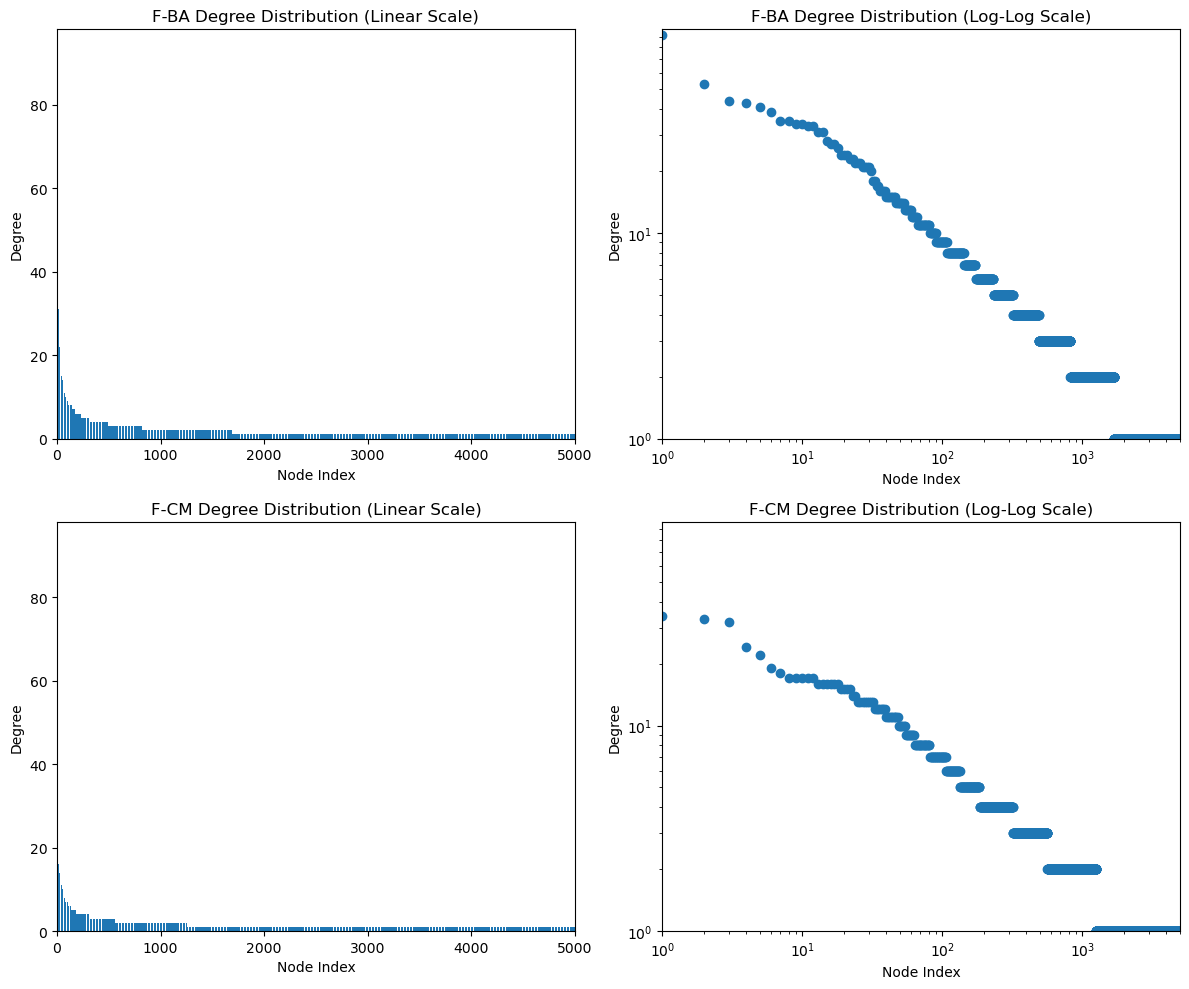

In [56]:

# plot linear and loglog in each of their own plots in a 2x2 subplot
plt.figure(figsize=(12, 10))

# Find common axis limits
ymax_linear = max(max(degree_sequence_F_BA), max(degree_sequence_F_CM))
ymin_log = min(min(degree_sequence_F_BA), min(degree_sequence_F_CM))
ymax_log = ymax_linear

xmax = max(len(degree_sequence_F_BA), len(degree_sequence_F_CM))

plt.subplot(2, 2, 1)
plt.bar(range(len(degree_sequence_F_BA)), degree_sequence_F_BA, width=0.8, align='center')
plt.title('F-BA Degree Distribution (Linear Scale)')
plt.xlabel('Node Index')
plt.ylabel('Degree')
plt.ylim(0, ymax_linear)
plt.xlim(0, xmax)

plt.subplot(2, 2, 2)
plt.loglog(range(len(degree_sequence_F_BA)), degree_sequence_F_BA, marker='o', linestyle='None')
plt.title('F-BA Degree Distribution (Log-Log Scale)')
plt.xlabel('Node Index')
plt.ylabel('Degree')
plt.ylim(ymin_log, ymax_log)
plt.xlim(1, xmax)

plt.subplot(2, 2, 3)
plt.bar(range(len(degree_sequence_F_CM)), degree_sequence_F_CM, width=0.8, align='center')
plt.title('F-CM Degree Distribution (Linear Scale)')
plt.xlabel('Node Index')
plt.ylabel('Degree')
plt.ylim(0, ymax_linear)
plt.xlim(0, xmax)

plt.subplot(2, 2, 4)
plt.loglog(range(len(degree_sequence_F_CM)), degree_sequence_F_CM, marker='o', linestyle='None')
plt.title('F-CM Degree Distribution (Log-Log Scale)')
plt.xlabel('Node Index')
plt.ylabel('Degree')
plt.ylim(ymin_log, ymax_log)
plt.xlim(1, xmax)

plt.tight_layout()
plt.show()

**Exercise: Growth without preferential attachment**

Finally, we'll build a network of same size and degree as in the exercise above, using the growth mechanism without the preferential attachment. Follow the steps below for success

Grow a new network (the Sune-network) with the same parameters as the F-BA network in the exercise above, i.e. 5000 nodes, each new node connects to the existing network, but with one key difference: have the incoming nodes connect to the existing nodes with equal probability. This is the Sune-network.
Generate an ER network of same number of nodes and links as the Sune-network.
What are the differences between the ER network and the Sune-network? Explain in your own words.
Hints: To get started, plot the two degree distribution in the same plot. Compare and contrast. Another revealing network property to study is the the number of connected components.